In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
import global_values
from displaying import *
from groups import *

# rotated = np.rot90(arr, k=3)  # 1 CCW rotation = 3 CW

In [2]:
image_path = "disney_puzzle/aladin.jpg" 
# image_path = "angry.jpg"
output_folder = "fragments"
global_values.COL_NR = 8
global_values.ROW_NR = 8
fragments, tile_h, tile_w = divide_image(image_path, output_folder, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

sides_comparisons = create_sides_comparisons(fragments)



sorted_sides_comparisons = sort_sides_comparisons(sides_comparisons)

n = len(fragments)
s = 4  
global_values.SYMMETRIC_COMPARISONS = [[[[None for _ in range(s)] for _ in range(s)] for _ in range(n)] for _ in range(n)]

for c in sides_comparisons:
    global_values.SYMMETRIC_COMPARISONS[c.side1.fragment_idx][c.side2.fragment_idx][c.side1.side_idx][c.side2.side_idx] = c
    symmetric_comp = SidesComparison(fragments, c.side2, c.side1)
    global_values.SYMMETRIC_COMPARISONS[c.side2.fragment_idx][c.side1.fragment_idx][c.side2.side_idx][c.side1.side_idx] = symmetric_comp



Rotations by fragment: 0:0, 1:2, 2:3, 3:3, 4:1, 5:2, 6:1, 7:2, 8:3, 9:0, 10:1, 11:3, 12:0, 13:1, 14:3, 15:0, 16:3, 17:2, 18:0, 19:1, 20:1, 21:1, 22:0, 23:0, 24:1, 25:0, 26:3, 27:1, 28:3, 29:0, 30:2, 31:3, 32:3, 33:0, 34:3, 35:2, 36:0, 37:0, 38:3, 39:3, 40:2, 41:2, 42:3, 43:0, 44:2, 45:1, 46:1, 47:0, 48:1, 49:3, 50:2, 51:0, 52:2, 53:2, 54:2, 55:3, 56:3, 57:1, 58:1, 59:2, 60:3, 61:0, 62:0, 63:2


100%|██████████| 63/63 [00:02<00:00, 27.40it/s]


In [3]:
groups = []
fragment_idx_to_group_idx = [None for _ in fragments]

for fr_idx in range(len(fragments)):
    new_group = Group(fr_idx)
    groups.append(new_group)
    fragment_idx_to_group_idx[fr_idx] = fr_idx
# show_all_groups(groups, fragments)
print(fragment_idx_to_group_idx)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


Sides Comp: Score=0.002904773809229599 Fragment_idx1=10, Side_idx1=2; fragment_idx2=11, side_idx2=2
anchor side of orientation 2 with fragment rotated  0 times  has index 2
pasted side or orientation 0 with fragment rotated 2 has index 2
Sides Comp: Score=0.006526177878725625 Fragment_idx1=29, Side_idx1=1; fragment_idx2=30, side_idx2=1
anchor side of orientation 1 with fragment rotated  0 times  has index 1
pasted side or orientation 3 with fragment rotated 2 has index 1
Sides Comp: Score=0.006951110975360522 Fragment_idx1=25, Side_idx1=1; fragment_idx2=26, side_idx2=2
anchor side of orientation 1 with fragment rotated  0 times  has index 1
pasted side or orientation 3 with fragment rotated 1 has index 2
Sides Comp: Score=0.0071304139250934154 Fragment_idx1=30, Side_idx1=3; fragment_idx2=31, side_idx2=2
anchor side of orientation 1 with fragment rotated  2 times  has index 3
pasted side or orientation 3 with fragment rotated 1 has index 2
Sides Comp: Score=0.008443876982775616 Fragment

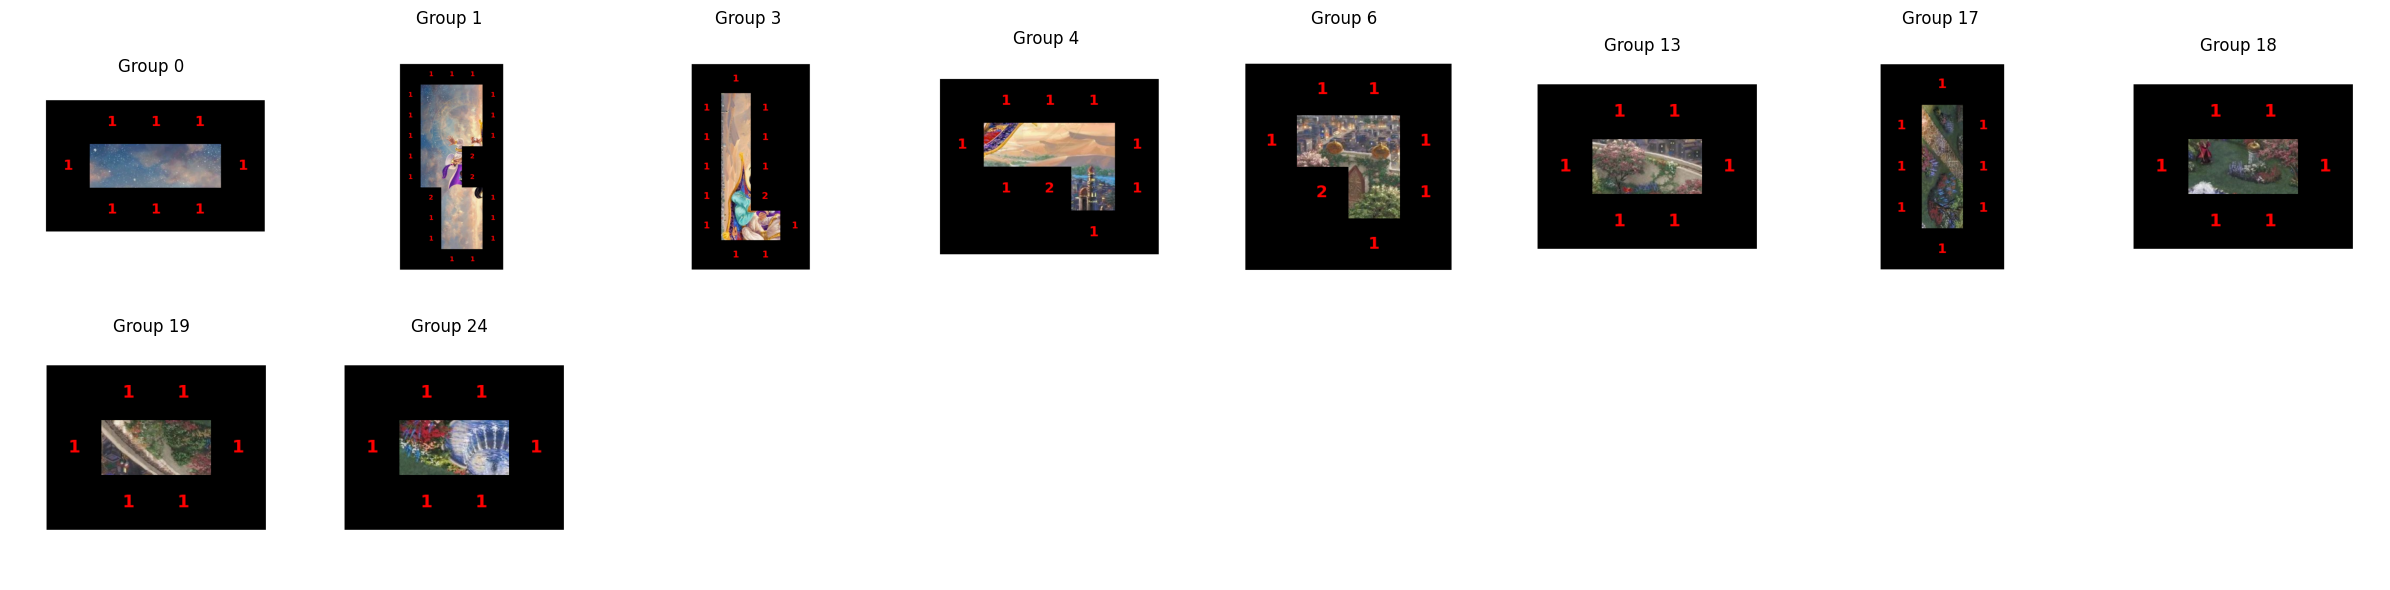

{0: [1, 1], 1: [1, 2], 2: [1, 3]}
{8: [8, 2], 3: [5, 1], 9: [7, 2], 16: [8, 3], 17: [7, 3], 18: [6, 3], 10: [6, 2], 11: [5, 2], 4: [4, 1], 5: [3, 1], 6: [2, 1], 7: [1, 1], 12: [4, 2], 13: [3, 2], 21: [3, 3], 14: [2, 2], 22: [2, 3], 15: [1, 2], 23: [1, 3]}
{19: [1, 1]}
{24: [1, 1], 25: [2, 1], 26: [3, 1], 27: [4, 1], 20: [5, 2], 28: [5, 1]}
{29: [1, 1], 30: [1, 2], 31: [1, 3], 39: [2, 3]}
{32: [1, 1]}
{33: [1, 1], 34: [1, 2], 42: [2, 2]}
{35: [1, 1]}
{36: [1, 1]}
{37: [1, 1]}
{38: [1, 1]}
{40: [1, 1]}
{41: [1, 1]}
{43: [1, 1], 44: [1, 2]}
{45: [1, 1]}
{46: [1, 1]}
{47: [1, 1]}
{48: [1, 1], 49: [2, 1], 50: [3, 1]}
{51: [1, 1], 52: [1, 2]}
{53: [1, 2], 54: [1, 1]}
{55: [1, 1]}
{56: [1, 1]}
{57: [1, 1]}
{58: [1, 1]}
{59: [1, 2], 60: [1, 1]}
{61: [1, 1]}
{62: [1, 1]}
{63: [1, 1]}


In [4]:
for comp in sorted_sides_comparisons:
    if comp.score <= global_values.IMAGE_TH:

        anchor_fragment_idx = comp.side1.fragment_idx
        pasted_fragment_idx = comp.side2.fragment_idx
        anchor_group_idx = fragment_idx_to_group_idx[anchor_fragment_idx]
        pasted_group_idx = fragment_idx_to_group_idx[pasted_fragment_idx]

        if anchor_group_idx != pasted_group_idx:

            shifted_anchor_group, shifted_pasted_group, pasted_group_additional_rotation = simulate_merge_positions(fragments, comp, groups[anchor_group_idx], groups[pasted_group_idx])

            if does_merge_fit_within_bounds(shifted_anchor_group):
                if check_groups_shapes_for_merging(shifted_anchor_group, shifted_pasted_group):
                    print(f"{comp}")

                    if check_all_group_matchings_scores(fragments, pasted_group_additional_rotation, shifted_anchor_group, shifted_pasted_group):    
                    # score = calculate_all_group_matchings_scores(shifted_anchor_group, shifted_pasted_group)

                        groups[anchor_group_idx] = merge_groups(fragments, pasted_group_additional_rotation, shifted_anchor_group, shifted_pasted_group, fragment_idx_to_group_idx)
                        update_after_merge(groups, fragments, fragment_idx_to_group_idx, pasted_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 1)

for g in groups:
    print(g.fragment_positions)


In [5]:
groups, fragments, fragment_idx_to_group_idx = solve_groups(groups, fragments, fragment_idx_to_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)

for g in groups:
    print(f"group rows: {g.row_nr} cols: {g.col_nr}")


TypeError: simulate_merge_positions() missing 1 required positional argument: 'pasted_group'